# Restaurant Reviews Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv("Restaurant_Reviews.tsv",sep='\t')

In [3]:
# First five rows
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# Last five rows
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
# Shape of data
data.shape

(1000, 2)

* Dataset contains 2 columns with 1000 features.

In [6]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
# Check Statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [8]:
# Check Statistics of data for categorical data
data.describe(include='O')

,Review
count,1000
unique,996
top,I would not recommend this place.
freq,2


In [9]:
# Check missing values
data.isnull().sum()

Review    0
Liked     0
dtype: int64

# Exploratory Data Analysis

In [10]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

<AxesSubplot:xlabel='Liked', ylabel='count'>

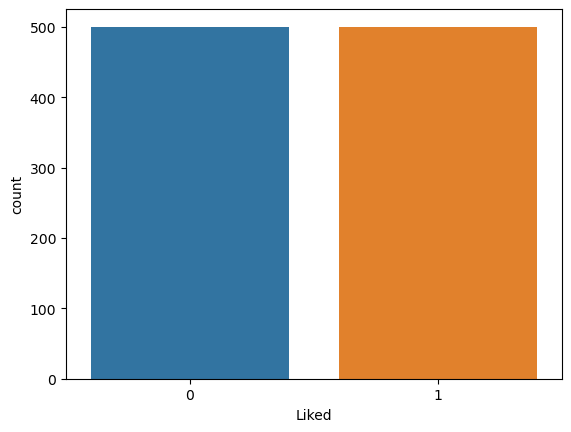

In [11]:
sns.countplot(x=data['Liked'])

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Text Cleaning

In [13]:
# Initialize empty array
# to append clean text
corpus = []

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['Review'][i])
    
    # convert all cases to lower cases
    review = review.lower()
    
    # split to array(default delimiter is " ")
    review = review.split()
    
    # creating PorterStemmer object to take main stem of each word
    ps = PorterStemmer()
    
    # loop for stemming each word in string array at ith row  
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))]
    
    # rejoin all string array elements to create back into a string
    review = ' '.join(review) 
    
     #append each string to create array of clean text
    corpus.append(review)

In [14]:
# Old and New Text
pd.concat([data,pd.DataFrame(corpus,columns=['New'])],axis=1)

,Review,Liked,New
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price
...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor textur lack
996,Appetite instantly gone.,0,appetit instantli gone
997,Overall I was not impressed and would not go b...,0,overal impress would go back
998,"The whole experience was underwhelming, and I ...",0,whole experi underwhelm think go ninja sushi n...


# Bag of words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [16]:
x = cv.fit_transform(corpus).toarray()
y = data['Liked']

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 20)

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[105,  16],
       [ 50,  79]], dtype=int64)

In [21]:
print(accuracy_score(y_test,y_pred))

0.736


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       121
           1       0.83      0.61      0.71       129

    accuracy                           0.74       250
   macro avg       0.75      0.74      0.73       250
weighted avg       0.76      0.74      0.73       250



## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred_log=log.predict(x_test)
y_pred_log

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [25]:
print(accuracy_score(y_test,y_pred_log))

0.772


In [26]:
cm = confusion_matrix(y_test,y_pred_log)
cm

array([[99, 22],
       [35, 94]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       121
           1       0.81      0.73      0.77       129

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.78      0.77      0.77       250



## Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [29]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [30]:
print(accuracy_score(y_test,y_pred_log))

0.772


In [31]:
cm =  confusion_matrix(y_test,y_pred)
cm

array([[ 86,  35],
       [ 26, 103]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       121
           1       0.75      0.80      0.77       129

    accuracy                           0.76       250
   macro avg       0.76      0.75      0.75       250
weighted avg       0.76      0.76      0.76       250



# Sample Prediction

In [33]:
def predict_sentiment(sample_review):
    word = []
    sample_review = re.sub('[^a-zA-z]',' ',sample_review)
    sample_review = sample_review.lower()
    sample_review = sample_review.split()
    ps = PorterStemmer()
    sample_review = [ps.stem(word) for word in sample_review if not word in set(stopwords.words('english'))]
    sample_review = ' '.join(sample_review)
    word.append(sample_review)
    temp = cv.transform(word).toarray()
    return model.predict(temp)[0]

In [34]:
if (predict_sentiment("Food was very good an dit was pretty as well")):
    print("Good Review")
else:
    print("Bad Review")

Good Review


# Save Model

In [35]:
import pickle
pickle.dump(model, open("model_random.pkl", "wb"))